[Python_for_Data_Science](https://pythonfordatascience.org/paired-samples-t-test-python/)
[Opensourcefordatascience](https://github.com/Opensourcefordatascience/Data-sets)
[scipy.stats.ttest_rel](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_rel.html)

In [1]:
%matplotlib inline

In [2]:
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/blood_pressure.csv')[['bp_before','bp_after']]
print(df.head())

   bp_before  bp_after
0        143       153
1        163       170
2        153       168
3        153       142
4        146       141


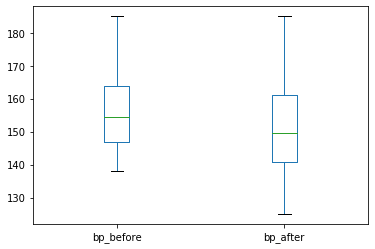

In [4]:
# check for any significant outliers 
df.plot(kind='box')
plt.savefig('img/boxplot_outliers.png')

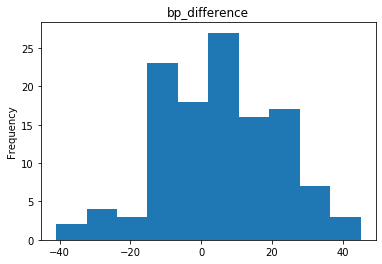

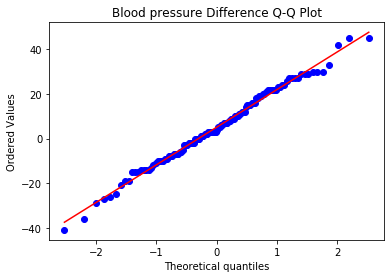

0.9270282358267637
0.9572747240899964
0.7841846942901611
0.9250387239622251


In [5]:
# Remember that for the dependent sample T-test the normality check 
# needs to be conducted on differences between the two scores.
df['bp_difference'] = df['bp_before'] - df['bp_after']

# histogrm
df['bp_difference'].plot(kind='hist', title= 'bp_difference')
plt.savefig('img/blood pressure difference histogram.png')
plt.show()

# qq plot
stats.probplot(df['bp_difference'], plot= plt)
plt.title('Blood pressure Difference Q-Q Plot')
plt.savefig('img/blood pressure difference qq plot.png')
plt.show()

# various test for normality
x = df['bp_difference']
_, p = stats.jarque_bera(x)
print(p)
_, p = stats.normaltest(x)
print(p)
_, p = stats.shapiro(x) 
print(p)
x_ = (x-np.mean(x))/np.std(x)
_, p = stats.kstest(x_, 'norm')
print(p)

In [6]:
statistic, p_value = stats.ttest_rel(df['bp_before'], df['bp_after'])
print(statistic, p_value)

3.3371870510833657 0.0011297914644840823


In [7]:
x_bar = df['bp_difference'].mean()
s = df['bp_difference'].std(ddof=1)
n = df['bp_difference'].shape[0] 
statistic = x_bar / np.sqrt(s**2/n)

DF = n-1
p_value = 2*stats.t.cdf(-np.abs(statistic), DF)

print(statistic, p_value)

3.337187051083365 0.0011297914644840825
